### K-Means
#### This method is a algorithm capable of clustering unlabeled data. 
In this script, we will import some clustered unlabeled data and we will use kmeans to label the data.

In [1]:
import numpy as np
import pandas as pd
# Scikit-Learn ≥0.20 is required
import sklearn as sk
assert sk.__version__ >= "0.20"

%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt

#import the file fruit_data_with_colors.txt
blob = pd.read_csv(r"blob.csv")

In [2]:
blob

,X1,X2
0,-2.296479,0.290940
1,-2.723795,1.529272
2,1.165675,1.011659
3,-2.920970,1.506737
4,-2.274509,1.150755
...,...,...
1995,-2.571314,-0.056530
1996,-2.593127,1.548842
1997,-2.509106,3.288443
1998,0.535502,2.088402


<IPython.core.display.Javascript object>


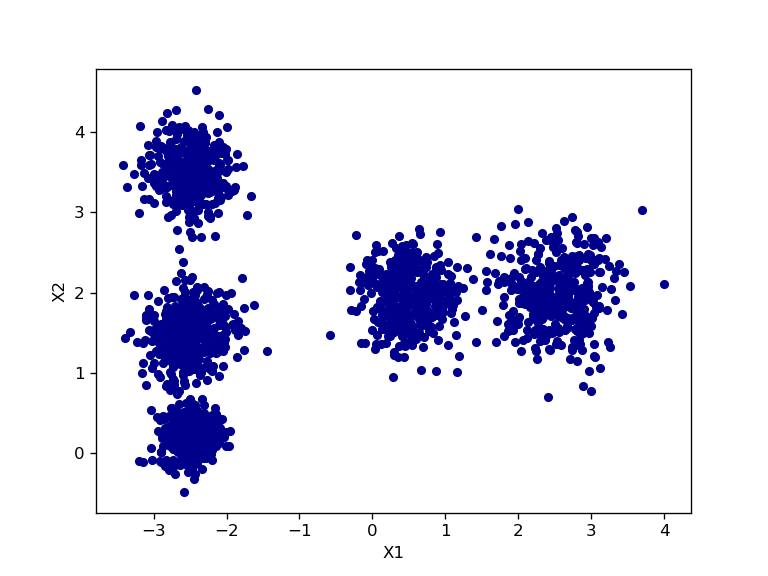

In [3]:
blob.plot.scatter(x="X1", y="X2", color="DarkBlue")

### Nice bounderies plot
*taken from Aurelion Geron [Geron-ML]*

In [4]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [5]:
from sklearn.cluster import KMeans
k=5

km = KMeans(n_clusters=k)
y_predict = km.fit_predict(blob)

In [6]:
y_predict

array([4, 1, 3, ..., 2, 3, 1], dtype=int32)

In [7]:
blob_labels = blob
blob_labels = blob_labels.assign(labels_pred=y_predict)
blob_labels

,X1,X2,labels_pred
0,-2.296479,0.290940,4
1,-2.723795,1.529272,1
2,1.165675,1.011659,3
3,-2.920970,1.506737,1
4,-2.274509,1.150755,1
...,...,...,...
1995,-2.571314,-0.056530,4
1996,-2.593127,1.548842,1
1997,-2.509106,3.288443,2
1998,0.535502,2.088402,3


<IPython.core.display.Javascript object>


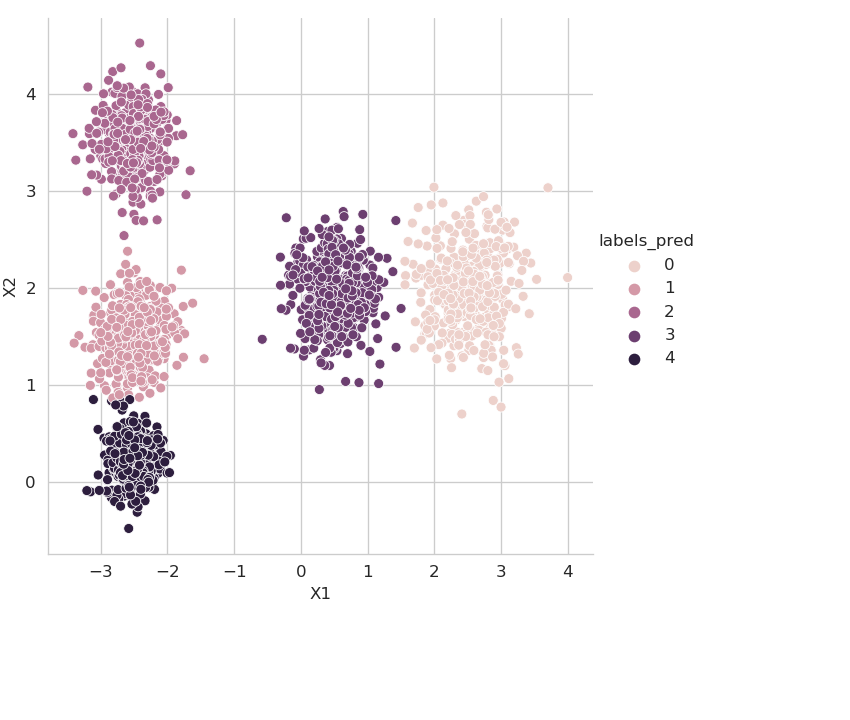

In [8]:
import seaborn as sns

sns.set_style("whitegrid") 
# Use the 'hue' argument to provide a factor variable

sns.relplot(x="X1", y="X2", hue="labels_pred", data=blob_labels)


<IPython.core.display.Javascript object>


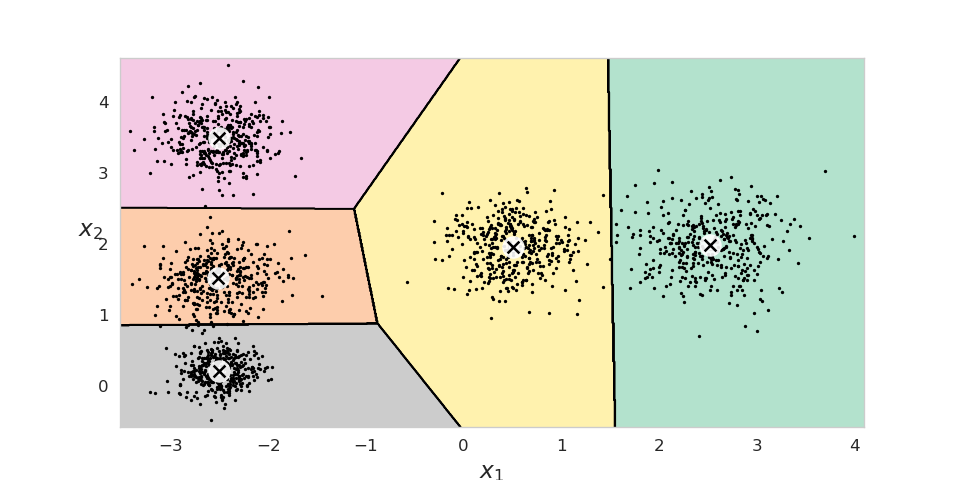

In [9]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(km, blob.values)


In [10]:
km.cluster_centers_

array([[ 2.52548361,  1.98730421],
       [-2.51648699,  1.51472916],
       [-2.50280425,  3.49450491],
       [ 0.50242022,  1.95886178],
       [-2.50532653,  0.21219323]])

### K-Means Algorithm
The K-Means algorithm is one of the fastest clustering algorithms, but also one of the simplest:
* First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
* Repeat until convergence (i.e., until the centroids stop moving):
    * Assign each instance to the closest centroid.
    * Update the centroids to be the mean of the instances that are assigned to them.

In [67]:
km.inertia_

391.10317148275533

### We will talk about the inertia in the lecture, what it means to the K-Means algorithm and what is definition is.

### K-Means
Can we just pick the model with the lowest inertia? Well unfortunally not! Because when you increase *k* the inertia will go down. But plotting the inertia over *k* you will recognize, that the inertia drops quickly but after a certain *k* it does'nt drop

### References
[Geron-ML] "Hands on machine learning with scikit learn, keras and tensorflow", Aurelion Geron, O'Reilly